In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.duplicated().sum()

415

In [6]:
df=df.drop_duplicates()

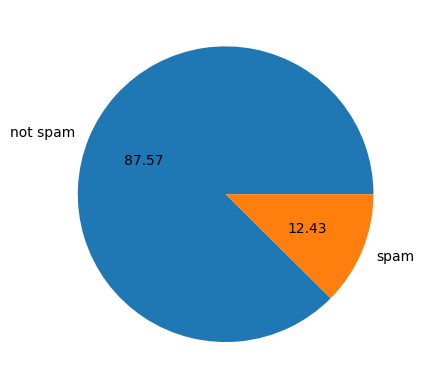

In [7]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

In [8]:
import nltk

In [9]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [10]:
df.replace({'ham':0,'spam':1})

<ipython-input-10-1cbda20ad29c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'ham':0,'spam':1})


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df.rename (columns = {'Category': 'result','Message': 'input'}, inplace=True)

In [13]:
df['result'] = df['result'].replace({'ham': 0, 'spam': 1})

<ipython-input-13-c05f8f96c6fe>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['result'] = df['result'].replace({'ham': 0, 'spam': 1})


In [14]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['countCharacters'] = df['input'].apply(len)
#creating a new column with count of words
df['countWords'] = df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
df['countSentences'] = df['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

In [16]:
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# def transform_text(text):
# #converting to Lower case
#   text = text.lower()
#   #tokenization
#   text = nltk.word_tokenize(text)
#   #removing special characters
#   removedSC = list()
#   for i in text:
#     if i.isalnum():
#       removedSC.append(i)
#   #updating the text after removed special characters
#   text = removedSC[:]
#   removedSWPC = list()
#   for i in text:
# #stopwords words('english') is a function of 'nltk', returns list of english : #string punctuation is a part of 'string' module, containing the ASCII punctua
#     if i not in stopwords.words('english') and i not in string.punctuation:
#       removedSWPC.append(i)
# #updating the text after removed stop words and punctuation characters
#   text = removedSWPC[:]
#   #stemming the data using 'PorterStemmer' algorithm.
#   #nLtk module provides this class to use.
#   ps = PorterStemmer()
#   stemmed = list()
#   for i in text:
#     stemmed.append(ps.stem(i))
#   text = stemmed[:]
#   return " ".join(text)

In [18]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [20]:
stop_words = stopwords.words('english')

In [21]:
ps = PorterStemmer()
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove special characters and stopwords
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words and word not in string.punctuation]
    # Stem the words
    stemmed_words = [ps.stem(word) for word in filtered_words]
    return " ".join(stemmed_words)

In [22]:
df['processed'] = df['input'].apply(transform_text)

In [23]:
df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [24]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

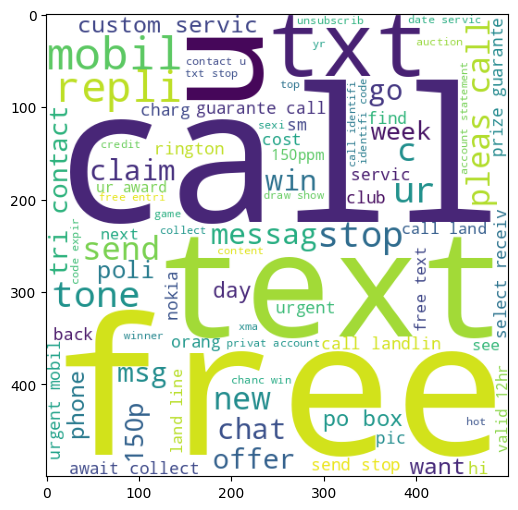

In [25]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=" "))
#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

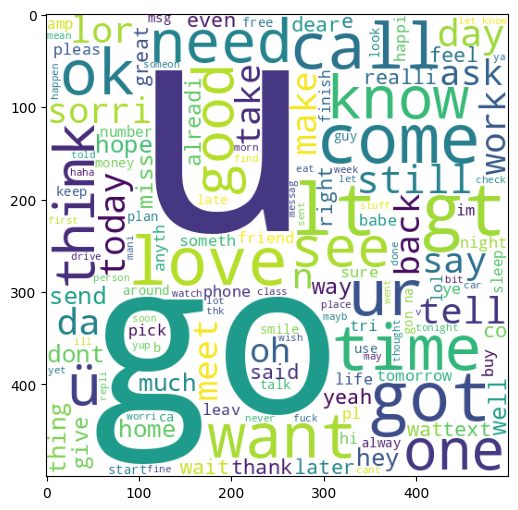

In [46]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=" "))
#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [26]:
spamWords = list()
for msg in df[df['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append (word)
spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [27]:
from collections import Counter

In [28]:
spamWordsDictionary = Counter(spamWords)
#to extract the most common words
spamWordsDictionary.most_common (40)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42),
 ('collect', 42),
 ('messag', 41),
 ('per', 40),
 ('custom', 39),
 ('chat', 37),
 ('tri', 36),
 ('msg', 35),
 ('number', 35),
 ('cs', 34),
 ('draw', 33)]

In [29]:
mostCommonSPAM=pd.DataFrame(spamWordsDictionary.most_common(40))

In [30]:
import seaborn as sns

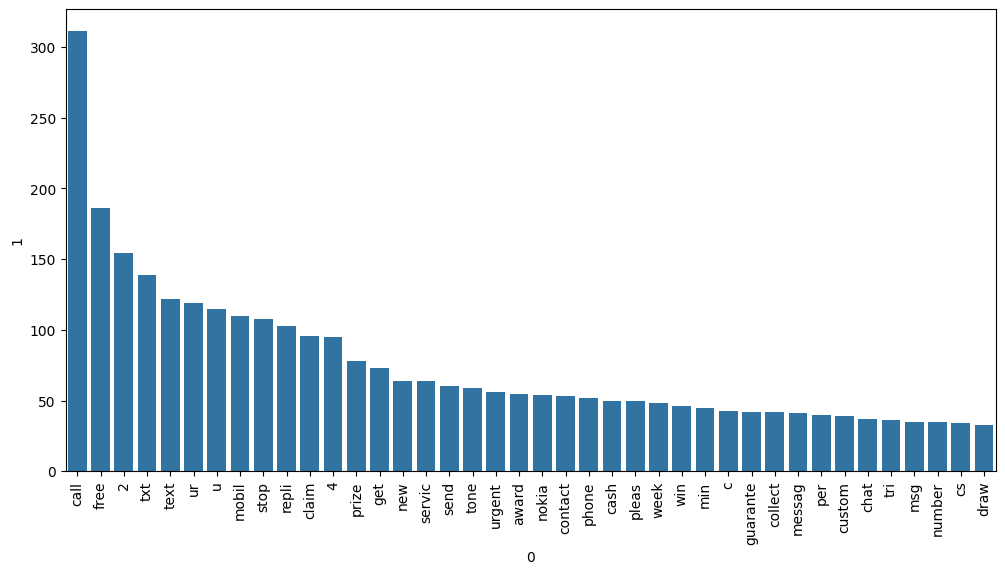

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [33]:
X =cv.fit_transform(df['processed']).toarray()

X.shape

(5157, 6781)

In [34]:
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(X_train, y_train)

y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

print(precision_score(y_test, y_pred1))

0.8633720930232558
[[768 130]
 [ 11 123]]
0.48616600790513836


In [38]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print (accuracy_score(y_test, y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.9777131782945736
[[884  14]
 [  9 125]]
0.8992805755395683


In [39]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test, y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9660852713178295
[[891   7]
 [ 28 106]]
0.9380530973451328


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer # Importing the TfidfVectorizer class
tf = TfidfVectorizer()
#transforming the data of processed column
X = tf. fit_transform(df['processed']). toarray()
#storing the values of the 'result' column
y = df['result'].values
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [41]:
gnb.fit(X_train, y_train)

y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

print(precision_score(y_test, y_pred1))

0.8536821705426356
[[765 133]
 [ 18 116]]
0.46586345381526106


In [42]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print (accuracy_score(y_test, y_pred2))
print (confusion_matrix(y_test, y_pred2))
print (precision_score(y_test, y_pred2))

0.9534883720930233
[[898   0]
 [ 48  86]]
1.0


In [43]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print (accuracy_score(y_test, y_pred3))
print (confusion_matrix(y_test, y_pred3))
print (precision_score(y_test, y_pred3))

0.9660852713178295
[[891   7]
 [ 28 106]]
0.9380530973451328


In [44]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [45]:
from graphviz import Digraph

# Create a directed graph
system_design = Digraph(comment='Proposed System Design', format='png')

# Define nodes
system_design.node('A', 'Data Collection', shape='rectangle', style='filled', color='lightblue')
system_design.node('B', 'Data Preprocessing', shape='rectangle', style='filled', color='lightblue')
system_design.node('C', 'Feature Extraction', shape='rectangle', style='filled', color='lightblue')
system_design.node('D', 'Model Training', shape='rectangle', style='filled', color='lightblue')
system_design.node('E', 'Model Evaluation', shape='rectangle', style='filled', color='lightblue')
system_design.node('F', 'Spam Classification', shape='rectangle', style='filled', color='lightblue')

# Define edges
system_design.edges(['AB', 'BC', 'CD', 'DE', 'EF'])

# Add sub-nodes for details
system_design.node('B1', 'Tokenization', shape='ellipse', color='orange')
system_design.node('B2', 'Stopword Removal', shape='ellipse', color='orange')
system_design.node('B3', 'Stemming', shape='ellipse', color='orange')

system_design.edge('B', 'B1')
system_design.edge('B', 'B2')
system_design.edge('B', 'B3')

system_design.node('C1', 'TF-IDF Vectorizer', shape='ellipse', color='orange')
system_design.node('C2', 'CountVectorizer', shape='ellipse', color='orange')

system_design.edge('C', 'C1')
system_design.edge('C', 'C2')

# Render the graph to file
file_path = '/mnt/data/Proposed_System_Design'
system_design.render(file_path)
file_path + '.png'

'/mnt/data/Proposed_System_Design.png'